# Programming Assignment 5 - Logistic Regression 

In the assignment, you will use gradient ascent to find the weights for the logistic regression problem.   

As an example, we will use the widely-used breast cancer data set.  This data set is described here:

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin

Each sample is a collection of features that were manually recorded by a physician upon inspecting a sample of cells from fine needle aspiration.  The goal is to detect if the cells are benign or malignant.

## Step 1:  Getting, preprocessing, and understanding the dataset

### Importing the standard libraries

In [134]:
# Importing important libraries
from sklearn.datasets import load_breast_cancer # taking included data set from Sklearn http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

### Importing the dataset

In [135]:
# Loading the dataset
cancer = load_breast_cancer()
y = cancer.target
X = cancer.data

In [136]:
# Printing the shape of data (X) and target (Y) values 
print(X.shape)
print(y.shape)

(569, 30)
(569,)


### Data Pre-Processing
#### Splitting the data into train and test before scaling the dataset


In [137]:
# train_test_split to split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

#### Scale the data since we will be using gradient ascent

In [138]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [139]:
# TODO - Print the shape of x_train and y_train 
 # When you print the shape of x_train, it should print (426, 30)
 # When you print the shape of y_train, it should print (426,)
print(X_train.shape)
print(y_train.shape)

(426, 30)
(426,)


#### Adding a column of ones to the  matrices $X_{train}$ and  $X_{test}$
After adding a column of ones $X_{train}=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$

Similarly for $X_{test}$

In [140]:
# Appending a column of ones to x_train 

# Step 1: Create a column vector of ones (i.e. a vector of shape N',1)
ones = np.ones(X_train.shape[0]).reshape((X_train.shape[0], 1))
# Step 2: Append a column of ones in the beginning of x_train
X_train = np.hstack((ones, X_train))

# Now do the same for the test data
# Step 1: Create a column vector of ones (i.e. a vector of shape N",1)
ones = np.ones(X_test.shape[0]).reshape((X_test.shape[0], 1))
# Stemp 2: Append a column of ones in the beginning of x_test
X_test = np.hstack((ones, X_test))


# We can check that everything worked correctly by:
# Printing out the new dimensions
print("The trainng data has dimensions: ", X_train.shape, ". The testing data has dimensions: ",X_test.shape)
# Looking at the first two rows of X_train to check everything worked as expected
print(X_train[0:2])

The trainng data has dimensions:  (426, 31) . The testing data has dimensions:  (143, 31)
[[ 1.         -0.34913849 -1.43851335 -0.41172595 -0.39047943 -1.86366229
  -1.26860704 -0.82617052 -0.95286585 -1.72936805 -0.9415409  -0.86971355
  -1.35865347 -0.83481506 -0.57230673 -0.74586846 -0.65398319 -0.52583524
  -0.94677147 -0.53781728 -0.63449458 -0.54268486 -1.65565452 -0.58986401
  -0.52555985 -1.51066925 -0.89149994 -0.75021715 -0.91671059 -0.92508585
  -0.80841115]
 [ 1.         -0.20468665  0.31264011 -0.13367256 -0.27587995  1.07807258
   0.86354605  0.72631375  0.89844062  1.17876963  1.47437716 -0.04022275
  -0.50962253  0.10947722 -0.13472838 -0.52489487 -0.14934475  0.07460028
   0.23747244 -0.43028253  0.08289146  0.04148684  0.68989862  0.19412774
  -0.05193356  1.12941497  0.92394223  1.22221738  1.43655962  1.14955889
   1.56911143]]


### Understanding the dataset

In [141]:
# Printing the names of all the features
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
# You can add your own code here to better understand the dataset


# Step 2: Fitting the model
## Implementing Logistic Regression Using Gradient Ascent


 Before writing the gradient ascent code, first write some helpful functions


 
### Sigmoid($z$)
The first function you will write is sigmoid($z$)

sigmoid($z$) takes as input a column vector of real numbers, $z^T = [z_1, z_2, ..., z_{N'}]$, where $N'$ is the number of  examples

It should produce as output a column vector $\left[\frac{1}{1+e^{-z_1}},\frac{1}{1+e^{-z_2}},...,\frac{1}{1+e^{-z_{N'}}}\right]^T$

In [142]:
# TODO - Write the sigmoid function (z can be a scalar or a vector)
def sigmoid(z):
    ## TODO
    output = []
    if np.isscalar(z):
        e = np.exp(-z)
        sum1 = 1 + e
        res = 1/sum1
        output.append(res)
    else:
        for element in z:
            exp = np.exp(-element)
            sm = 1 + exp
            result = 1/sm
            output.append(result)
    return output
    ## 

In [143]:
# VERIFY - Sigmoid of 0 should be equal to 0.5
print(sigmoid(0))

[0.5]


### Initializing ${\bf w}$
For testing the next functions, we create a coefficient vector, ${\bf w}$.
We will initialize the coeffients to be $0$, i.e. ${\bf w}^T = [0,0,\ldots ,0]$ (We could have initialized ${\bf w}$ to any values.)

In [144]:
# Initialize parameters w
w = np.zeros((X_train.shape[1], 1))
print(w.shape)

(31, 1)


### Our hypothesis, $h({\bf x})$
The next  function to write is our hypothesis function. 

For example if our design matrix $X$ consists of single example $X=[1,x_1,x_2,\ldots,x_d]$ and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, it returns $h({\bf x})=\frac{1}{1+e^{-\left({w_{0}\cdot 1 +w_1\cdot x_1+\cdots w_d\cdot x_d}\right)}}$

If given a  matrix consisting of $N'$ examples 
$X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, the function returns a column vector
$[h({\bf x}^{(1)}),h({\bf x}^{(2)},\ldots, h({\bf x}^{(N')}]^T$

In [145]:
# predict the probability that a patient has cancer 
# TODO - Write the hypothesis function 
def hypothesis(X , w):
    #TODO
    X = np.transpose(X)
    w = np.transpose(w)
    product = w.dot(X)
    result = sigmoid(product)
    return np.transpose(result)
    ##

Before moving on, do a quick check that your function can accpet a matrix as an argument. 

In [147]:
# Compute y_hat using our training examples and w (w is still set to zero).  
# This is just a preliminary test of the hypotheis function
yhat = hypothesis(X_train, w)

# print the sizes of yhat and y as a first check that the function performed correctly
print(yhat.shape) # this should return (426, 1)
print(y_train.shape) # this should return (426,)

(426, 1)
(426,)


### Log-Likelihood Function.
Write the code to calculate the log likelihood function $\ell({\bf w})=
\sum_{i=1}^{N'}y^{(i)}\ln(h({\bf x}^{(i)})) +(1- y^{(i)})\ln(1-h({\bf x}^{(i)}))$

The input is a matrix consisting of $N'$ examples $X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and a column vector ${\bf y}^T=[y^{(1)},y^{(2)},\dots,y^{(N')}]$ of labels for $X$.

The output is $\ell({\bf w})$

In [148]:
# TODO - Write the log likelihood function 
def log_likelihood(X , y , w ):
    ##TODO
    h = hypothesis(X, w)
    output = 0
    for i in range(len(h)):
        term1 = y[i] * np.log(h[i])
        diff1 = 1 - y[i]
        diff2 = np.log(1-h[i])
        term2 = diff1 * diff2
        result = term1 + term2
        output += result
    log_likelihood = output.item(0)
    ##
    return log_likelihood # you should return a real number, not a list containing a real number

Before moving on, do a quick check of your log_likelihood function

In [149]:
# VERIFY - The value should be equal to -295.2806989185367.
print(log_likelihood(X_train,y_train,w))

-295.2806989185373


# Gradient Ascent
Now write the code to perform gradient ascent.  You will use the update rule from the lecture notes.

In [150]:
# TODO - Write the gradient ascent function 
def Logistic_Regresion_Gradient_Ascent(X, y, learning_rate, num_iters):
    # For every 100 iterations, store the log_likelihood for the current w
    # Initializing log_likelihood to be an empty list  
    log_likelihood_values = []
    # Initialize w to be a zero vector of shape x_train.shape[1],1
    w = np.zeros((X.shape[1], 1))
    # Initialize N to the number of training examples
    N = X.shape[0] 
    ## TODO 
    for i in range(num_iters):
        derivatives = []
        X_T = np.transpose(X)
        h = hypothesis(X, w)
        diff = y - h.flatten()
        for j in range(len(X[0])):
            sum1 = 0
            for k in range(len(diff)):
                prod = diff[k]*X[k][j]
                sum1 += prod
            derivatives.append(sum1)
        for a in range(len(w)):
            q = learning_rate/N
            p = q*derivatives[a]
            w[a] += p
    ##
        if (i % 100) == 0:
            log_likelihood_values.append(log_likelihood(X,y,w))
        
    return w, log_likelihood_values

### After completing the code above, run the following

In [151]:
learning_rate = 0.5
num_iters = 5000 # The number of iteratins to run the gradient ascent algorithm

w, log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_train, y_train, learning_rate, num_iters)
print(w)
print(log_likelihood_values)

[[-0.1056701 ]
 [-0.03553097]
 [-0.0536691 ]
 [ 0.17221516]
 [-0.31116366]
 [-0.45434972]
 [ 2.75131896]
 [-1.30570826]
 [-3.03314808]
 [ 1.16803283]
 [-0.85636742]
 [-3.72793978]
 [ 0.72266145]
 [-0.80953786]
 [-2.47051644]
 [-0.40297532]
 [ 0.53078335]
 [ 0.03099043]
 [-1.27545053]
 [ 1.31001975]
 [ 2.1018566 ]
 [-1.64716699]
 [-2.84431473]
 [-0.20035616]
 [-1.77971341]
 [-0.16157425]
 [ 0.73553297]
 [-2.45713669]
 [-1.31520556]
 [-2.99931319]
 [-0.38232592]]
[-104.34561005259047, -30.61342104059971, -26.679954427411644, -24.76478769939303, -23.544913930501764, -22.668618640929317, -21.995874538657667, -21.45672990771386, -21.00947210360729, -20.627251944141722, -20.292743277182126, -19.99462548460866, -19.725219641902154, -19.479089646022683, -19.25224210193073, -19.04165372573557, -18.844978275885225, -18.660356638383075, -18.486289239717966, -18.321547742766644, -18.165112366906538, -18.016126409492422, -17.873862603144904, -17.73769779540659, -17.607093594208834, -17.481581364550

# Plotting Likelihood v/s Number of Iterations.

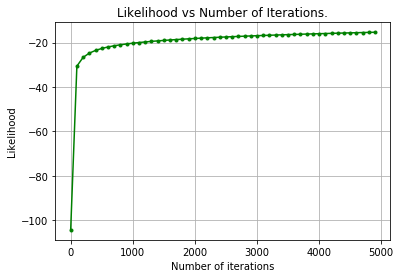

In [152]:
# Run this cell to plot Likelihood v/s Number of Iterations.
iters = np.array(range(0,num_iters,100))
plt.plot(iters,log_likelihood_values,'.-',color='green')
plt.xlabel('Number of iterations')
plt.ylabel('Likelihood')
plt.title("Likelihood vs Number of Iterations.")
plt.grid()

You should see the likelihood increasing as number of Iterations increase.

### The rest of your code goes here

In [176]:
def predict(y_pred, threshold):
    for i in range(len(y_test)):
        if y_pred[i] >= threshold:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    return y_pred

In [177]:
def confusion_matrix(y_test, predictions):
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    true_negatives = 0
    for i in range(len(y_test)):
        if y_test[i] == 1 and predictions[i] == 1:
            true_positives += 1
        elif y_test[i] == 0 and predictions[i] == 1:
            false_positives += 1
        elif y_test[i] == 1 and predictions[i] == 0:
            false_negatives += 1
        elif y_test[i] == 0 and predictions[i] == 0:
            true_negatives += 1
    return true_positives, false_positives, false_negatives, true_negatives

# Step 3: Evaluating your model

In [184]:
pd = hypothesis(X_test, w)
y_predictions = predict(pd, 0.5)
conf = confusion_matrix(y_test, y_predictions)
print(y_predictions.flatten())
print("True Positives: {0}, False Positives: {1}, False Negatives: {2}, True Negatives: {3}".format(conf[0], conf[1], conf[2], conf[3]))

[1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1.]
True Positives: 86, False Positives: 1, False Negatives: 3, True Negatives: 53


In [183]:
def f1_score(tp, fp, fn, tn):
    sum1 = tp + fp
    sum2 = tp + fn
    sum3 = fp + tn
    precision = tp/sum1
    recall = tp/sum2
    fpr = fp/sum3
    sum4 = precision + recall
    prod = precision * recall
    f1_score = prod/sum4
    f1_score *= 2
    return precision, recall, fpr, f1_score
f1 = f1_score(conf[0], conf[1], conf[2], conf[3])
print("Precision: {0}, Recall: {1}, FPR: {2}, F1_Score: {3}".format(f1[0], f1[1], f1[2], f1[3]))

Precision: 0.9885057471264368, Recall: 0.9662921348314607, FPR: 0.018518518518518517, F1_Score: 0.9772727272727273


In [194]:
# tuning the hyper paramters to find better values
new_learning_rate = 0.5
new_num_iters = 10000 

new_w, new_log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_train, y_train, new_learning_rate, new_num_iters)
print(new_w)
print(new_log_likelihood_values)

[[-0.54253129]
 [ 0.1713573 ]
 [-0.10812794]
 [ 0.5131075 ]
 [-0.21702832]
 [-0.60829694]
 [ 4.31462032]
 [-1.66566682]
 [-4.49674402]
 [ 1.4722293 ]
 [-1.63527874]
 [-5.18691283]
 [ 0.92041619]
 [-0.30590011]
 [-3.21003538]
 [-0.4108233 ]
 [-0.07670714]
 [ 0.55937167]
 [-1.98776135]
 [ 1.8412442 ]
 [ 2.93966762]
 [-2.11433102]
 [-3.21006588]
 [ 0.33211958]
 [-2.3449386 ]
 [ 0.24184158]
 [ 1.04904343]
 [-3.28646968]
 [-1.0582045 ]
 [-3.80863377]
 [-0.54371314]]
[-104.34561005259047, -30.61342104059971, -26.679954427411644, -24.76478769939303, -23.544913930501764, -22.668618640929317, -21.995874538657667, -21.45672990771386, -21.00947210360729, -20.627251944141722, -20.292743277182126, -19.99462548460866, -19.725219641902154, -19.479089646022683, -19.25224210193073, -19.04165372573557, -18.844978275885225, -18.660356638383075, -18.486289239717966, -18.321547742766644, -18.165112366906538, -18.016126409492422, -17.873862603144904, -17.73769779540659, -17.607093594208834, -17.481581364550

In [205]:
# adjusting the threshold to get a better f1 score
new_pd = hypothesis(X_test, new_w)
new_y_predictions = predict(new_pd, 0.1)
new_conf = confusion_matrix(y_test, new_y_predictions)
print(new_y_predictions.flatten())
print("True Positives: {0}, False Positives: {1}, False Negatives: {2}, True Negatives: {3}".format(new_conf[0], new_conf[1], new_conf[2], new_conf[3]))

[1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1.]
True Positives: 88, False Positives: 2, False Negatives: 1, True Negatives: 52


In [203]:
f1 = f1_score(new_conf[0], new_conf[1], new_conf[2], new_conf[3])
print("Precision: {0}, Recall: {1}, FPR: {2}, F1_Score: {3}".format(f1[0], f1[1], f1[2], f1[3]))

Precision: 0.9777777777777777, Recall: 0.9887640449438202, FPR: 0.037037037037037035, F1_Score: 0.9832402234636872
